In [1]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, fftshift
import numpy as np
import pandas as pd
from kymatio.scattering1d.filter_bank import scattering_filter_factory
from kymatio.numpy import Scattering1D
from ipywidgets import interactive
import ipywidgets as widgets
plt.style.use("ggplot")
import logging
from sklearn.linear_model import LogisticRegression


# Importing Modules
from Modules.train_test_split import return_train_test_split
from Modules.apply_padding import apply_padding
from Modules.transform_data import transform_data

In [2]:
# Importing recordings directory

from pathlib import Path
import os

recordings_dir = Path(os.getcwd()) / "recordings"

**Plotting a logarithmic scale**

In [3]:
def log_scale(w_0, Q, j):
    return (2**(-j/Q))*w_0

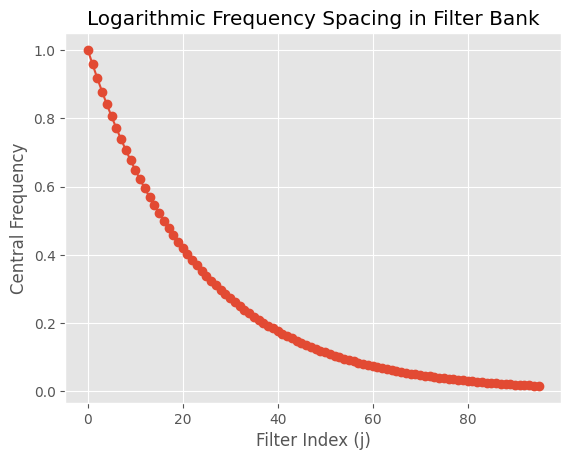

In [4]:
w_0 = 1
Q = 16 # wavelets per octave
J = 6  # Number of octaves
frequencies = [log_scale(w_0, Q, j) for j in range(J * Q)]

plt.plot(frequencies, marker='o')
plt.xlabel("Filter Index (j)")
plt.ylabel("Central Frequency")
plt.title("Logarithmic Frequency Spacing in Filter Bank")
plt.show()

### Question 1

**What is a wavelet? What is a filter bank? What is a wavelet scattering transform coefficient?**

A wavelet is a mathematical function with the following properties:
1. zero mean
2. finite energy

That can be convolved with a given signal to find out at what time point, different frequencies of the signal take place. A wavelet is "stretched" via a transformation to match a given frequency. A filter bank usually containing different frequencies in a logarathmic scale, transforms the wavelet to match those frequencies in the signal. Each filter is convolved with the signal (at every point in time). This gives us the wavelet transform coefficients, which will make a T (time periods) x W (frequencies in filter bank) matrix.


### Question 2

Install kymatio.

Chose the following values for our wavelet parameters:

`T=8192`

`J=6`

`Q=(16,16)`

Using the scattering_filter_factory method of kymatio.scattering1d.filter_bank, load the filter bank corresponding to these parameters.

In [5]:
# generate filters

morlet_filters = scattering_filter_factory(N=8192, T=8192, J=6, Q=(16,16))

In [6]:
# unpack filters

phi_f, phi_1, phi_2 = morlet_filters

### Question 3

Plot the first-order wavelets at original resolution (i.e., $T$ samples) in the frequency domain.

Do an interactive plot for all 63 first-order wavelets in the bank.

Use log-scale for the frequency axis, what do you observe?


### Question 4

Do a similar plot, but now in the time domain, using the inverse FFT.




In [7]:
def plot_wavelets(wavelet_num):

    # this obtains the n = 1..63 wavelet of first order
    # This is the magnitude of the wavelength at every time point
    wavelets = phi_1[wavelet_num]["levels"][0]

    # obtaining fourier transform for frequency
    fourier = fft(wavelets)

    # obtaining frequency
    freq = fftfreq(len(fourier), 1)

    # obtaining halfway point

    # obtaining halfway point
    half_point = len(fourier) // 2

    # plotting by frequency
    plt.subplot(2,1,1)
    plt.plot(freq[:half_point], np.abs(fourier[:half_point]))
    plt.xlabel("Frequency (log-scale)")
    plt.xscale("log") 
    plt.title("Plot for all 63 1-st order wavelets in filter bank")

    # obtaining inverse FFT
    inv_fft = ifft(fourier)
    
    # plotting
    plt.subplot(2,1,2)
    plt.plot(np.real(inv_fft))
    plt.xlabel("Time")
    #plt.xscale("log") 
    #plt.title("Plot for all 63 1-st order wavelets in filter bank")

    plt.tight_layout()

# Create interactive widget
interactive_plot = interactive(
    plot_wavelets,
    wavelet_num=widgets.IntSlider(min=0, max=62, step=1, value=1),

)

display(interactive_plot)

interactive(children=(IntSlider(value=1, description='wavelet_num', max=62), Output()), _dom_classes=('widget-…

Higher wavelets capture higher frequency components that are more localised in time.

### Question 5

Show the second order wavelets at original resolution in the time domain.

What do you observe?


In [8]:
def plot_wavelets_2(wavelet_num):

    # this obtains the n = 1..63 wavelet of first order
    # This is the magnitude of the wavelength at every time point
    wavelets = phi_2[wavelet_num]["levels"][0]

    # obtaining fourier transform for frequency
    fourier = fft(wavelets)

    # obtaining frequency
    freq = fftfreq(len(fourier), 1)

    # obtaining halfway point

    # obtaining halfway point
    half_point = len(fourier) // 2

    # plotting by frequency
    plt.subplot(2,1,1)
    plt.plot(freq[:half_point], np.abs(fourier[:half_point]))
    plt.xlabel("Frequency (log-scale)")
    plt.xscale("log") 
    plt.title("Plot for all 63 2-nd order wavelets in filter bank")

    # obtaining inverse FFT
    inv_fft = ifft(fourier)
    
    # plotting
    plt.subplot(2,1,2)
    plt.plot(np.real(inv_fft))
    plt.xlabel("Time")
    #plt.xscale("log") 
    #plt.title("Plot for all 63 1-st order wavelets in filter bank")

    plt.tight_layout()

# Create interactive widget
interactive_plot = interactive(
    plot_wavelets_2,
    wavelet_num=widgets.IntSlider(min=0, max=62, step=1, value=1),

)

display(interactive_plot)

interactive(children=(IntSlider(value=1, description='wavelet_num', max=62), Output()), _dom_classes=('widget-…

### Question 6

Fetch the spoken digit data and plot the goerge time series for digit 0 in an interactive plot.

To fetch the data you can use:

```python
from kymatio.datasets import fetch_fsdd
info_dataset = fetch_fsdd(verbose=True)
```

Then you can access the data via the info_dataset object and read the wav files with scipy.io.wavfile.read.


In [9]:
from kymatio.datasets import fetch_fsdd
info_dataset = fetch_fsdd(verbose=True)

In [10]:
from pathlib import Path
import os

recordings_dir = Path(os.getcwd()) / "recordings"

In [11]:
# Obtain absolute paths to recordings

#for file in sorted(recordings_dir.iterdir()):
#    print(file)

george_wav = sorted(recordings_dir.iterdir())[0]

george_wav

PosixPath('/home/trapfishscott/Cambridge24.25/D100_Research_Computing/Problem_set_4/WaveletML/recordings/0_george_0.wav')

In [12]:
# obtain wav file

sample_rate, data = wavfile.read(str(george_wav))

/home/trapfishscott/Cambridge24.25/D100_Research_Computing/Problem_set_4/RC_PS4_venv/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/trapfishscott/Cambridge24.25/D100_Research_Computing/Problem_set_4/RC_PS4_venv/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


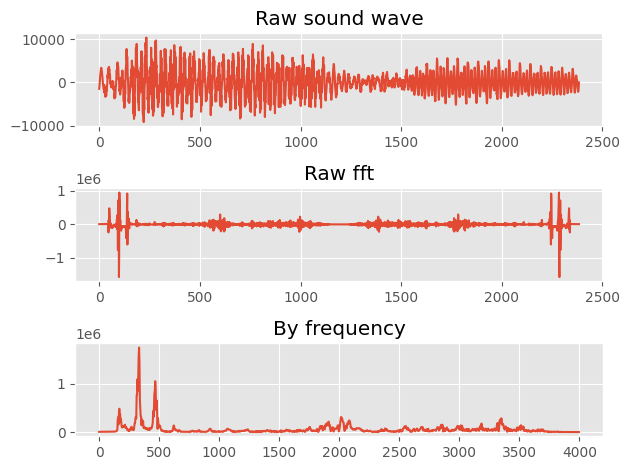

In [13]:
# plotting original sound wave
plt.subplot(3,1,1)
plt.plot(data)
plt.title("Raw sound wave")
###

# Taking fft transform
fft_data = fft(data)

# plotting raw fft transform
plt.subplot(3,1,2)
plt.plot(fft_data)
plt.title("Raw fft")
###

# obtaining frequency
freq = fftfreq(len(data), 1/sample_rate)

# obtaining halfway point
half_point = len(data) // 2

# plotting by frequency
plt.subplot(3,1,3)
plt.plot(freq[:half_point], np.abs(fft_data[:half_point]))
plt.title("By frequency")

plt.tight_layout()
plt.show()


### Question 7

What is the time duration of these signals? Give your answer simply as a number of time samples.

Is it constant for all recordings?

What is the duration of the signal 0_george_0.wav?

Store the signal in a variable x.


In [14]:
sound_files = sorted(recordings_dir.iterdir())

# obtaining sample rate

# obtain wav file

for file in sound_files:
    sample_rate, data = wavfile.read(str(file))
    print(len(data))

# Sound files are of different length

2384
4727
5958
3661
4050
4349
4304
4186
5054
4674
5581
4465
5332
4347
4260
3963
3984
3907
3687
4941
4449
4474
4208
5007
3286
2174
4483
3659
3621
3418
3270
2579
2684
2965
4323
4124
3026
3409
3300
3649
3997
3733
3885
4016
4082
5145
5148
5381
4209
4602
5148
4261
5451
4914
4087
4716
4982
5110
4423
4237
5235
5103
4257
4970
4797
4826
4720
5136
4942
4663
5165
5144
4621
4788
5120
4571
4939
5318
5266
5015
4782
4979
5277
4648
4329
5711
5510
5288
4999
5320
5259
5394
5328
5187
6273
4591
5052
4431
4629
5065
5083
5475
4014
4273
4344
4736
4436
5019
4783
5076
4896
5021
5870
5157
5022
4395
4237
7929
4803
4281
7187
4551
4254
4455
4628
4175
4308
4225
5207
4793
6286
4761
4836
7389
4072
4574
4434
6381
4482
5914
3762
5048
4771
5967
4953
4830
4288
4117
5218
9341
3500
3751
3755
4594
4393
3822
3756
4124
3957
3822
4527
3688
2857
3601
4076
3193
3600
3465
3516
3583
3635
3974
3431
4429
3693
2998
2872
2936
2998
2904
2778
2651
2746
3409
3893
3811
3717
3716
3686
3561
3842
3685
3624
3560
3343
3251
4357
3143
3786
3858


In [15]:
# obtain wav file

sample_rate, x = wavfile.read(str(george_wav))

print(f"the length of 0_George_0 is {len(x)}")

the length of 0_George_0 is 2384


Question 8

We now compute the scattering transform of 0_george_0.wav.

To do so, use the method ```Scattering1D``` from ```kymatio.torch```. Instantiate it via:

```scattering = Scattering1D(J, T, Q)```

Chose $J=6$, $Q=16$ and (here $Q$ is not a tuple, just a single integer).

What do $J$ and $Q$ control?

Before computing the scattering transform, we need first to convert the array into a torch tensor and then normalize the signal ```x``` with ```max``` so it varies between -1 and 1.

Then, compute the scattering transform of ```x``` via:

```Sx = scattering(x)```

What is the shape of Sx? What does each dimension represent?

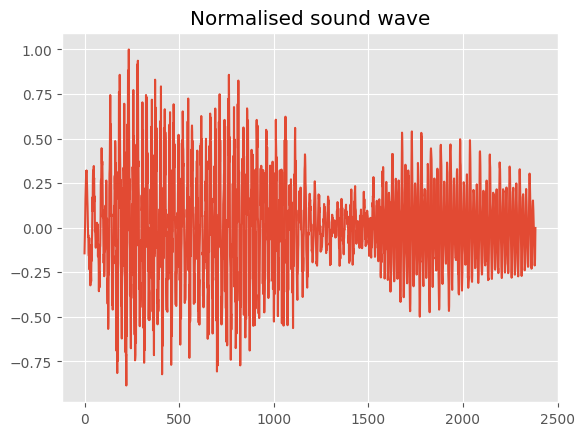

In [16]:
# Normalising the input

x = x / np.max(np.abs(x))

# plotting
plt.title("Normalised sound wave")
plt.plot(x)

In [17]:
T = x.shape[-1]
J = 6  # Number of octaves + averaging scale, which is given by 2**J
Q = 16 # wavelets per octaves - determines how high a frequency we can capture

In [18]:
# Instanciating scattering object
scattering = Scattering1D(J, T, Q)

# Computing scattering transform of x
Sx = scattering(x)

In [19]:
print(f"shape of Sx: {Sx.shape}")
print("the first dimension represents the wavelets")
print("the second dimension represents the time point")


shape of Sx: (222, 37)
the first dimension represents the wavelets
the second dimension represents the time point



### Question 9

How many scattering coefficients are there in total? How many coefficients of order 0, 1 and 2?

You can access the metadata of the scattering object via `scattering.meta`, and the order information by looking at the `order` key.


In [20]:
meta = scattering.meta()

# obtaining order of coefficients
order0 = np.where(meta['order'] == 0)
order1 = np.where(meta['order'] == 1)
order2 = np.where(meta['order'] == 2)

print("there are: ")
print(f"{len(Sx[order0])} - 0th order coefficients")
print(f"{len(Sx[order1])} - 1st order coefficients")
print(f"{len(Sx[order2])} - 2nd order coefficients")



there are: 
1 - 0th order coefficients
63 - 1st order coefficients
158 - 2nd order coefficients


### Question 10

Plot the zeroth-order scattering coefficient, both in a 1d plot and also in an imshow plot as a vector.

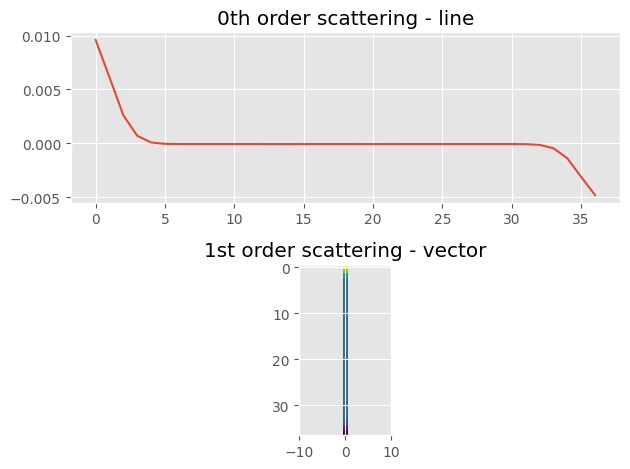

In [21]:
plt.subplot(2,1,1)
plt.title("0th order scattering - line")
plt.plot(Sx[order0][0])

plt.subplot(2,1,2)
plt.title("1st order scattering - vector")
plt.imshow(Sx[order0][0].reshape(-1,1))
plt.xlim(-10,10)

plt.tight_layout()


Question 11

Plot the first-order scattering coefficients, both in a 1d plot and also in an `imshow` plot as a matrix.

What is the name of the image plot?


In [22]:
# Lineplot of first order scattering coefficient

def plot_1st_order(wavelet):
    plt.subplot(2,1,1)
    plt.plot(Sx[order1][wavelet])
    plt.title("Line plot of 1st order coefficient")

    plt.subplot(2,1,2)
    plt.imshow(Sx[order1], aspect="auto")
    plt.title("Vector plot of all coefficients")

    plt.tight_layout()
    
# Create interactive widget
interactive_plot = interactive(
    plot_1st_order,
    wavelet=widgets.IntSlider(min=0, max=62, step=1, value=1),

)

display(interactive_plot)

interactive(children=(IntSlider(value=1, description='wavelet', max=62), Output()), _dom_classes=('widget-inte…


### Question 12

Plot the second-order scattering coefficients, both in a 1d plot and also in an imshow plot as a matrix.


In [23]:
# Lineplot of first order scattering coefficient

def plot_2nd_order(wavelet):
    plt.subplot(2,1,1)
    plt.plot(Sx[order2][wavelet])
    plt.title("Line plot of 2nd order coefficient")

    plt.subplot(2,1,2)
    plt.imshow(Sx[order2], aspect="auto")
    plt.title("Vector plot of all coefficients")

    plt.tight_layout()
    
# Create interactive widget
interactive_plot = interactive(
    plot_2nd_order,
    wavelet=widgets.IntSlider(min=0, max=157, step=1, value=1),

)

display(interactive_plot)

interactive(children=(IntSlider(value=1, description='wavelet', max=157), Output()), _dom_classes=('widget-int…

### Question 13

Using these tools in machine learning


Performing test train split

In [24]:
# Test train spil, index>5 gets added to testing set

train_set, test_set = return_train_test_split(sound_files=recordings_dir, index_to_test=5)


Longest sound wave is: 18262


In [25]:
print("training set: ")
print(train_set)
print(f"% train:  {len(train_set)/(len(train_set) + len(test_set))}")

print("")

print("test set: ")
print(test_set)
print(f"% test:  {len(test_set)/(len(train_set) + len(test_set))}")

training set: 
{'0_george_10': array([-175, -509,  293, ...,  -93, -137,  -89], dtype=int16), '0_george_11': array([ 103,  138,  196, ..., -273, -238, -173], dtype=int16), '0_george_12': array([ 67,  91, 104, ..., 161,  99, 164], dtype=int16), '0_george_13': array([-138, -124, -106, ...,  -99,  -78,  -69], dtype=int16), '0_george_14': array([ 12,  39, 179, ...,  83,  68, 114], dtype=int16), '0_george_15': array([-447, -407, -644, ...,  132,  105,   63], dtype=int16), '0_george_16': array([ 71,  98, 109, ...,  58,  45,  60], dtype=int16), '0_george_17': array([62, 72, 90, ..., 51, 39, 59], dtype=int16), '0_george_18': array([ -36,  -52,  -62, ...,  -63,  -59, -101], dtype=int16), '0_george_19': array([-222, -226, -247, ..., -162, -186, -171], dtype=int16), '0_george_20': array([ -93, -106,  -94, ...,   13,   70,   72], dtype=int16), '0_george_21': array([ 29, -37,  41, ..., -75,  13, 101], dtype=int16), '0_george_22': array([105, 103, 105, ...,  24,  47,  26], dtype=int16), '0_george_23

In [26]:
train_set_w_padding = apply_padding(train_set, desired_length_with_pad=18262)
test_set_w_padding = apply_padding(test_set, desired_length_with_pad=18262)

print("training set: ")
#print(train_set_w_padding)
print(f"% train:  {len(train_set_w_padding)/(len(test_set_w_padding) + len(train_set_w_padding))}")

print("")

print("test set: ")
#print(test_set_w_padding)
print(f"% test:  {len(test_set_w_padding)/(len(train_set_w_padding) + len(test_set_w_padding))}")

    

[ 0  0  0 ... -6  9  9]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[   0    0    0 ... -107 -184 -148]
[  0   0   0 ... -27  20 151]
[0 0 0 ... 0 0 0]
[   0    0    0 ... -711 -459 -344]
[  0   0   0 ... -71 104 210]
[  0   0   0 ... 620 486 386]
[    0     0     0 ... -1258 -1053 -1026]
[   0    0    0 ...  -85 -100 -114]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[  0   0   0 ... 193 203 357]
[    0     0     0 ...  -960 -1232 -1026]
[   0    0    0 ... 1424 1589 1515]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[   0    0    0 ...   23 1086 1169]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[    0     0     0 ...  -997  -873 -1139]
[  0   0   0 ... 455 452 608]
[0 0 0 ... 0 0 0

In [28]:
# Configure logging globally
logging.basicConfig(level=logging.CRITICAL, format='%(message)s')

train_set = transform_data(data=train_set, J=8, Q=12, verbose=0)
test_set = transform_data(data=test_set, J=8, Q=12, verbose=0)

transformation is 100.00% completeReturning data frame...
transformation is 100.00% completeReturning data frame...


In [29]:
train_set_w_padding = transform_data(data=train_set_w_padding, J=8, Q=12, verbose=0)
test_set_w_padding = transform_data(data=test_set_w_padding, J=8, Q=12, verbose=0)

transformation is 100.00% completeReturning data frame...
transformation is 100.00% completeReturning data frame...


In [ ]:
## Saving both as pickle files

In [ ]:
# everything but the name column
X_train = train_set.iloc[:,1:]
# The name column
Y_train = train_set.iloc[:,0]

# everything but the name column
X_test = test_set.iloc[:,1:]
# The name column
Y_test = test_set.iloc[:,0]

In [30]:
# Now with padding

# everything but the name column
X_train_w_pad = train_set_w_padding.iloc[:,1:]
# The name column
Y_train_w_pad = train_set_w_padding.iloc[:,0]

# everything but the name column
X_test_w_pad = test_set_w_padding.iloc[:,1:]
# The name column
Y_test_w_pad = test_set_w_padding.iloc[:,0]


In [ ]:
# Obtaining logistic classifier

log_reg = LogisticRegression()

# fitting classifier
log_reg.fit(X_train,Y_train)

log_reg.score(X_test, Y_test)

0.6916666666666667

In [31]:
# Now with padding
log_reg_pad = LogisticRegression()
log_reg_pad.fit(X_train_w_pad, Y_train_w_pad)
log_reg_pad.score(X_test_w_pad, Y_test_w_pad)

0.6388888888888888